# The Heart for Hockey
## An Analysis of the NHL's 2021-2022 Season & It's Generational Players
*Project by Evan Slaney*

<table><tr>
<td> <img src="./photos/NHL-Logo-1917.png" alt="1917 logo" style="width: 200px;"/> </td>
<td> <img src="./photos/NHL-Logo-1946.png" alt="1946 logo" style="width: 200px;"/> </td>
<td> <img src="./photos/NHL-logo.png" alt="2005 logo" style="width: 200px;"/> </td>
</tr></table>

*Documentation Notes* <br>
All data is provided by [hockey-reference.com](hockey-reference.com) via the NHL public statistics database, where massive amounts of hockey data (not just the NHL) can be discovered and used.<br>
In addition, data is drawn from the NHL's undocumented stats api using a python web scraper.<br>
NHL and the NHL Shield are registered trademarks of the National Hockey League. NHL and NHL team marks are the property of the NHL and its teams. © NHL 2022. All Rights Reserved.

**Table of Contents:**

I. Motivation<br>
II. Data Collection & Management<br>
III. Data Visualization & Analysis<br>
IV. Further Data Testing<br>
V. Conclusion<br>

## I. Motivation

Ice hockey is one of the most popular and loved sports across the United States and Canada. Personally, it is my favorite sport to watch and read up on. At each game there is a high-energy atmosphere, passionate fans, exciting gameplay, and what sets it apart from most other sports - fighting. Perhaps the greatest thing about living in the current technological era is our nearly unlimited access to data. 

In this project, I aim to make sense of the massive amounts of collected NHL data of the 2021-2022 season, provide insights, and explore relationships between the sets of data made available by the National Hockey League. In addition, I will be taking a glance at the league's most talked about players - historically and current.

The goal of this analysis is to identify and offer understanding to how NHL data is inexplicably linked in how teams and individuals perform. By doing this, fans of hockey may be able to find an appreciation for the beautiful sport of hockey, as well as the beauty in data.

## II. Data Collection & Management
### 2021-2022 Team Analysis
To begin the analysis of NHL team data from the 2021-2022 season, we first must pull all of the data available from *hockey-reference.com*, which gets all of their data from the NHL. We start by importing a csv of each team's statistics for that year, using the python Pandas library.

In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import json

%config InlineBackend.figure_format = 'retina'
sns.set(color_codes=True, palette='pastel')

teams = ['ANA', 'ARI', 'BOS', 'BUF', 'CAR', 'CBJ', 'CGY', 'CHI', 'COL', 'DAL', 'DET', 'EDM', 'FLA',
         'LAK', 'MIN', 'MTL', 'NJD', 'NSH', 'NYI', 'NYR', 'OTT', 'PHI', 'PIT', 'SEA', 'SJS', 'STL',
         'TBL', 'TOR', 'VAN', 'VEG', 'WPG', 'WSH']

teams_df = pd.DataFrame()

# Pull in all data from csv files and combine into one dataframe with all team data from the 2021-2022 season.
for team in teams:
    team_table = pd.read_csv('./teams_csv/' + team + '.csv', sep=',')
    team_table = team_table.drop(1)
    teams_df = pd.concat([teams_df, team_table])
    
teams_df['TeamCode'] = teams
teams_df.head()

,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,GA,...,PK%,SH,SHA,S,S%,SA,SV%,PDO,SO,TeamCode
0,Anaheim Ducks,27.9,82,31,37,14,76,0.463,228,266,...,80.80,6,4,2393,9.5,2725,0.902,99.3,4,ANA
0,Arizona Coyotes,28.0,82,25,50,7,57,0.348,206,309,...,75.00,3,4,2121,9.7,2910,0.894,99.7,1,ARI
0,Boston Bruins,28.5,82,51,26,5,107,0.652,253,218,...,81.30,5,6,2962,8.5,2354,0.907,99.1,4,BOS
0,Buffalo Sabres,27.5,82,32,39,11,75,0.457,229,287,...,76.42,6,6,2451,9.3,2702,0.894,99.0,1,BUF
0,Carolina Hurricanes,28.3,82,54,20,8,116,0.707,277,200,...,88.04,4,3,2798,9.9,2310,0.913,100.8,6,CAR


### All Time Greats
In addition to taking looks at team data, we will also be taking a look at 5 of the NHL's all time greats, how they compare to each other, what sets them apart, and more. We take this apart by reading in csv files of 5 of the NHL's greats: Wayne Gretzky, Gordie Howe, Mark Messier, Alex Ovechkin, and Sidney Crosby. As before, these datasets were pulled from *hockey-reference.com*.

In [36]:
greats_temp_df = pd.DataFrame()
players = ['gretzky', 'howe', 'messier', 'ovechkin', 'crosby']

for player in players:
    player_table = pd.read_csv('./greats/' + player + '.csv')
    player_table['Name'] = player
    greats_temp_df = pd.concat([greats_temp_df, player_table])
    
greats_temp_df.head()

,Season,Age,Tm,Lg,GP,G,A,PTS,+/-,PIM,...,ATOI,Name,TSA,FOW,FOL,FO%,BLK,HIT,TK,GV
0,1978-79,18.0,TOT,WHA,80.0,46.0,64.0,110.0,20.0,19.0,...,NaN,gretzky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1978-79,18.0,INR,WHA,8.0,3.0,3.0,6.0,-3.0,0.0,...,NaN,gretzky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1978-79,18.0,EDO,WHA,72.0,43.0,61.0,104.0,23.0,19.0,...,NaN,gretzky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1979-80,19.0,EDM,NHL,79.0,51.0,86.0,137.0,14.0,21.0,...,NaN,gretzky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1980-81,20.0,EDM,NHL,80.0,55.0,109.0,164.0,41.0,28.0,...,NaN,gretzky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Below is a brief legend to help you understand what each team's statistic indicates:
* **AvAge** = Average age of team
* **GP** = Games played
* **W** = Wins
* **L** = Losses
* **OL** = Overtime/Shootout losses
* **PTS** = Points
* **PTS%** = Points percentage
* **GF** = Goals for
* **GA** = Goals against
* **SRS** = Simple Rating System (Goals above/below average)
* **GF/G** = Goals for per game
* **GA/G** = Goals against per game
* **PP** = Power play goals
* **PPO** = Power play opportunities
* **PP%** = Power play percentage
* **PPA** = Power play goals against
* **PPOA** = Power play opportunities against
* **PK%** = Penalty kill percentage
* **SH** = Short handed goals
* **SHA** = Short handed goals against
* **S** = Shots on goal
* **S%** = Shooting percentage
* **SA** = Shots against
* **SV%** = Save percentage
* **PDO** = Shooting % + save %
* **SO** = Shutouts
* **Standing** = League standing before playoffs
* **PQ** = Playoff qualified

If you are unfamiliar with some of these terms, don't worry! We will not be using all of them. To give you an idea of some of the main ones that aren't exactly inherently clear, I will explain them now.<br>
**Overtime/Shootout losses**: These only occur after 60 minutes of regulation time has expired. An overtime or shootout loss records as 1 point, whereas a win counts as 3, and a loss as 0.<br>
**Points Percentage**: This is just the percentage of games won in the regular season in which 82 games are played<br>
**Power Play**: A power play occurs when an opposing team commits a penalty infraction on the ice and has the number of players on the ice reduced by one. The team with the extra player is on a "Power Play"<br>
**Penalty Kill**: The opposite of a power play, this is the team that committed the infraction and the reduced amount of players on the ice.<br>
**Short-Handed**: A short handed goal or assist is when the team on a penalty scores a goal or gets an assist while down a player.<br>
**Shutouts**: A shutout is when a team does not concede a goal throughout the entire game.
**PQ**: Playoff Qualified (PQ) indicates whether a team has qualified for the playoffs - of which only 16 teams do.


#### Pre-processing
Typically, with internet-based datasets, we would have to account for null/Nan values, missing input, zero-filled columns, potential duplicates, etc. However, in the case of the provided dataset, the data is all present and containing no values that might cause issues later on. This is awesome! It allows us to get started sooner! For readability, we will add a League Standing column and sort our DataFrame by points.

In [37]:
# Sort the DataFrame by points, so the highest rank team is first, lowest rank is last.
teams_df.sort_values(inplace=True, by=['PTS%', 'OL'], ascending=False)
# Add a 'Standing' column to indicate team standing prior to playoffs
teams_df.insert(loc=0, column='Standing', value = np.arange(1,33))
# An additional column will also be added to indicate whether a team has made playoffs (1 for yes, 0 for no)
teams_df['PQ'] = teams_df['Standing'] <= 16
teams_df.reset_index(inplace=True)
teams_df.head()

,index,Standing,Team,AvAge,GP,W,L,OL,PTS,PTS%,...,SH,SHA,S,S%,SA,SV%,PDO,SO,TeamCode,PQ
0,0,1,Florida Panthers,27.8,82,58,18,6,122,0.744,...,12,8,3062,11.0,2515,0.904,100.4,5,FLA,True
1,0,2,Colorado Avalanche,28.2,82,56,19,7,119,0.726,...,6,5,2874,10.7,2625,0.912,101.2,7,COL,True
2,0,3,Carolina Hurricanes,28.3,82,54,20,8,116,0.707,...,4,3,2798,9.9,2310,0.913,100.8,6,CAR,True
3,0,4,Toronto Maple Leafs,28.4,82,54,21,7,115,0.701,...,13,4,2835,11.0,2511,0.900,100.2,7,TOR,True
4,0,5,Minnesota Wild,29.4,82,53,22,7,113,0.689,...,2,5,2666,11.4,2577,0.903,101.9,3,MIN,True


On the other hand, our all time great data needs some work. There were many statistics that were not collected for back when players like Messier, Gretzky, and Howe played (another cool testament to how far technology has come!). So we must get rid of those null values in areas where they occur - they will not be used in our analysis anyways. The same will go for Ovechkin and Crosby data, if anything was not collected at the time of the others, we have to remove that. 
In addition, we have to trim up the dataframe at the bottom, redistributing careers stats into a different dataframe, as well as removing WHA data.

In this dataset (and in many others), there can be lots of extra columns that do not necessarily offer anything to our desired data manipulation. This is okay, and it totally depends upon the individual and what they plan to do with the data. The nice thing about large datasets like these is that we have many opportunities to explore different facets of the data and discover numerous things about the data.

In [38]:
# Remove WHA years, does not contain stats and holds nan values
greats_temp_df = greats_temp_df[greats_temp_df['Lg'] != 'WHA']
# Drop columns that did not collect stats for certain players
greats_temp_df = greats_temp_df.drop(columns=['TOI', 'ATOI', 'TSA', 'FOW', 'FO%', 'FOL', 'BLK', 'HIT', 'TK', 'GV', 'S', 'S%', '+/-'])
# Drop rows that were bungled when imported (nan rows)
greats_temp_df = greats_temp_df[greats_temp_df['Lg'].notna()]
greats_temp_df = greats_temp_df[greats_temp_df['Age'].notna()]
greats_temp_df = greats_temp_df[greats_temp_df['Tm'] != 'TOT']

greats_temp_df = greats_temp_df.rename(columns={'Tm': 'Team', 'EV': 'EVG', 'PP': 'PPG', 'SH': 'SHG', 'EV.1': 'EVA', 'PP.1': 'PPA', 'SH.1': 'SHA'}) 

greats_df = pd.DataFrame()

for player in players:
    temp_df = greats_temp_df[greats_temp_df['Name'] == player].copy()
    temp_df['cumPoints'] = temp_df['PTS'].cumsum()  
    
    greats_df = pd.concat([greats_df, temp_df])
    
greats_df.head()

,Season,Age,Team,Lg,GP,G,A,PTS,PIM,EVG,PPG,SHG,GW,EVA,PPA,SHA,Name,cumPoints
3,1979-80,19.0,EDM,NHL,79.0,51.0,86.0,137.0,21.0,37.0,13.0,1.0,6.0,63.0,22.0,1.0,gretzky,137.0
4,1980-81,20.0,EDM,NHL,80.0,55.0,109.0,164.0,28.0,36.0,15.0,4.0,3.0,68.0,38.0,3.0,gretzky,301.0
5,1981-82,21.0,EDM,NHL,80.0,92.0,120.0,212.0,26.0,68.0,18.0,6.0,12.0,79.0,39.0,2.0,gretzky,513.0
6,1982-83,22.0,EDM,NHL,80.0,71.0,125.0,196.0,59.0,47.0,18.0,6.0,9.0,85.0,36.0,4.0,gretzky,709.0
7,1983-84,23.0,EDM,NHL,74.0,87.0,118.0,205.0,39.0,55.0,20.0,12.0,11.0,80.0,27.0,11.0,gretzky,914.0


## III. Data Visualization & Analysis

#### Comparing Teams
There are many things that we can look at to determine relationships between teams and their success on the ice. We will start out with some basic ones. Using matplotlib, we will take a look at each team's winning percentage by average age. For more information on matplotlib and to learn about how extensive this library is, visit [matplotlib.org](https://matplotlib.org/).

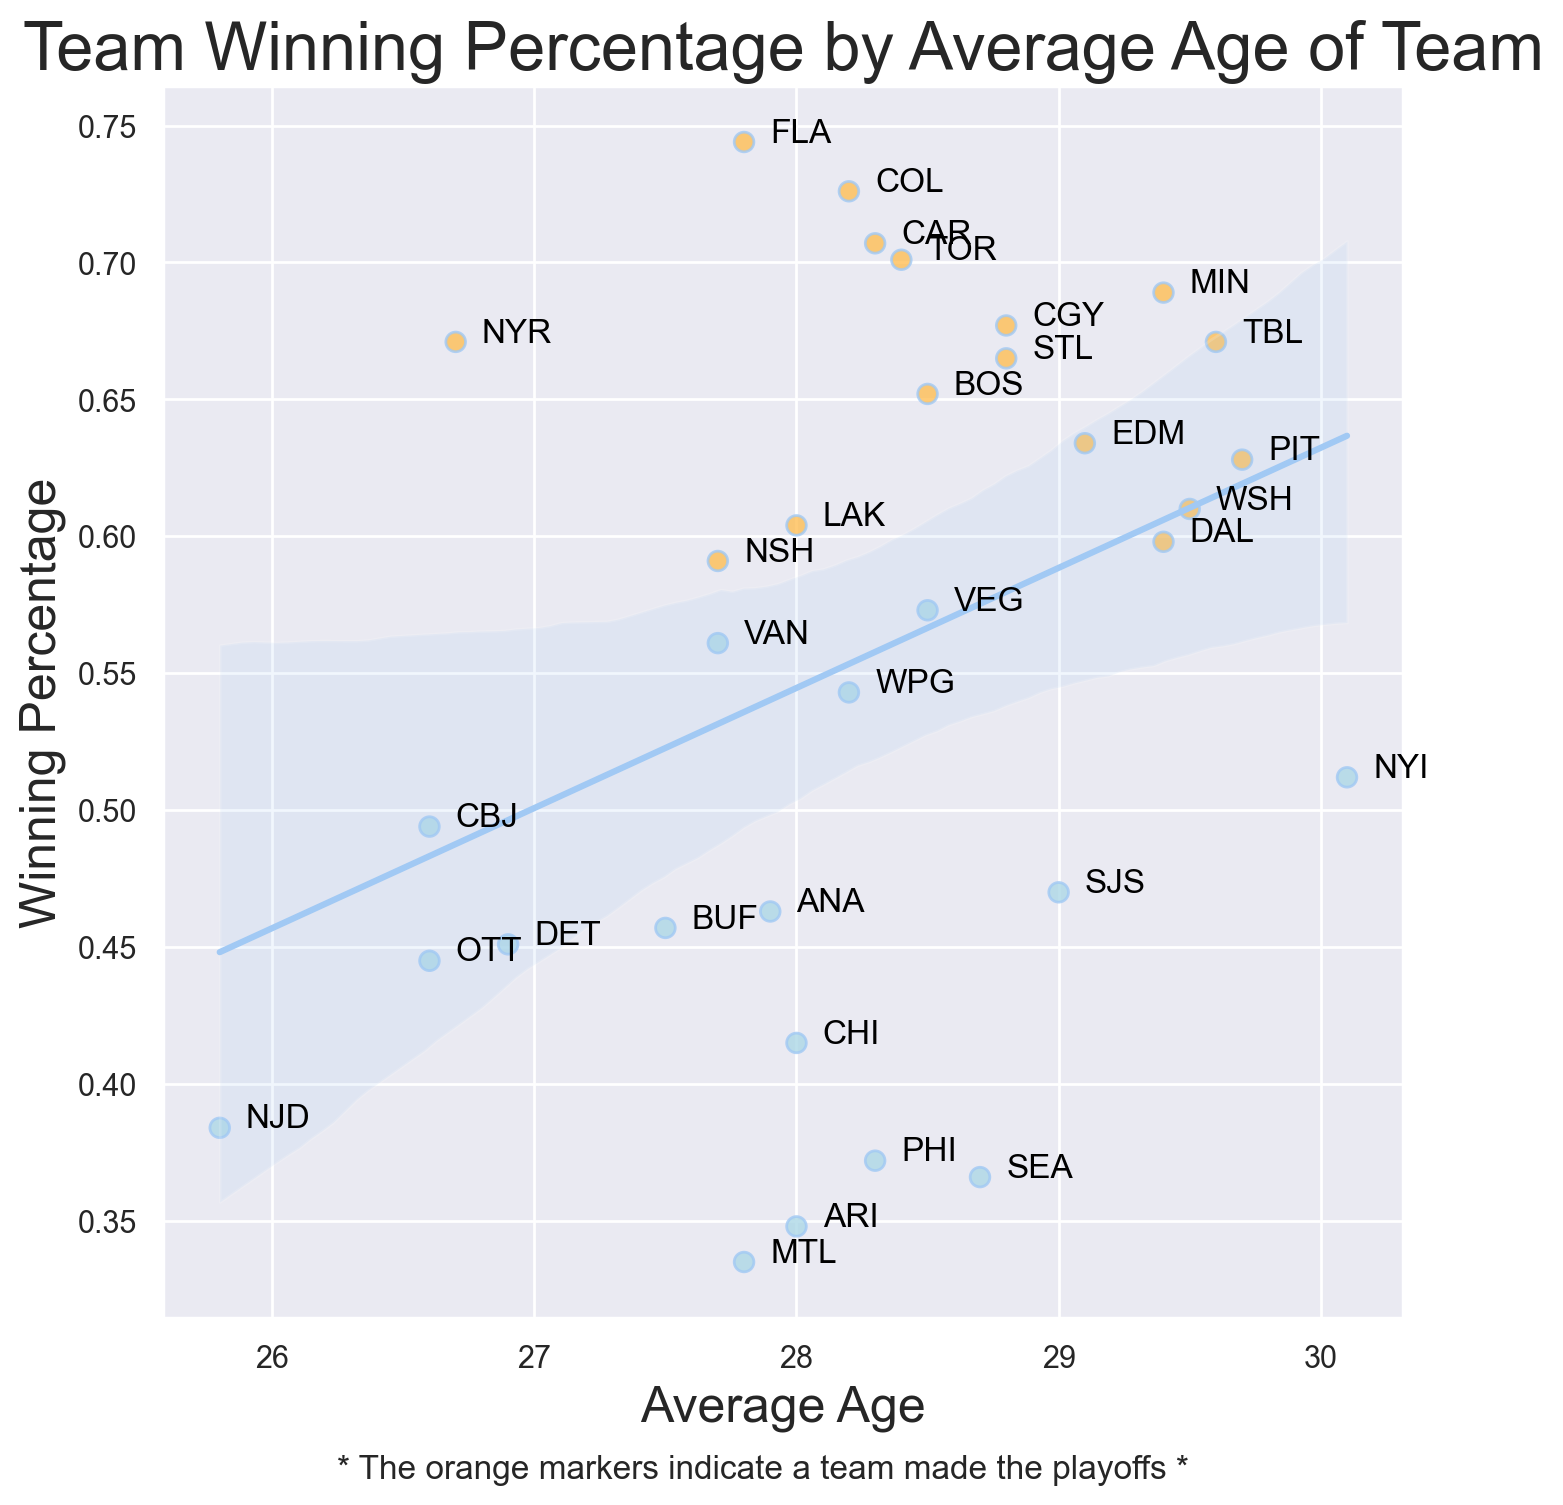

In [39]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)

teams_df['color'] = np.where(teams_df['PQ']==True, "#FFBF55", "lightblue")

# Creates a regression scatterplot with age on x axis, winning percentage on y axis
ax = sns.regplot(data=teams_df, x='AvAge', y='PTS%', scatter_kws={'s':50, 'facecolors':teams_df['color']})
# Changes plot labels
plt.title('Team Winning Percentage by Average Age of Team', fontsize=24)
plt.xlabel('Average Age', fontsize=18)
plt.ylabel('Winning Percentage', fontsize=18)

for team in teams:
    plt.text(teams_df['AvAge'][teams_df.TeamCode==team]+0.1,teams_df['PTS%'][teams_df.TeamCode==team], team, color='black')

txt="* The orange markers indicate a team made the playoffs *"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)    

plt.show()

Unfortunately, this graph doesn't tell us all that much. There seems to be a weak linear correlation between team winning percentage and the average age of their players. Although not all that useful to us, this could potentially be an important consideration for people such as general managers of these organization, as they need to make decisions about players and qualifying for playoff positions.

Let's move on.

Perhaps a more introspective relationship might lie in a teams power play percentage and a win, as well as a penalty kill percentage. From an outside perspective, special teams statistics are extremely underrated and valuable in team performance analysis. Using matplotlib and [seaborn](https://seaborn.pydata.org/), we can explore that relationship by creating a regression plot, in which all of the teams' win percentages are plotted as a function of win frequency. Only 16 teams make playoffs, so I found it best to indicate those playoff-qualifying teams with an orange marker.

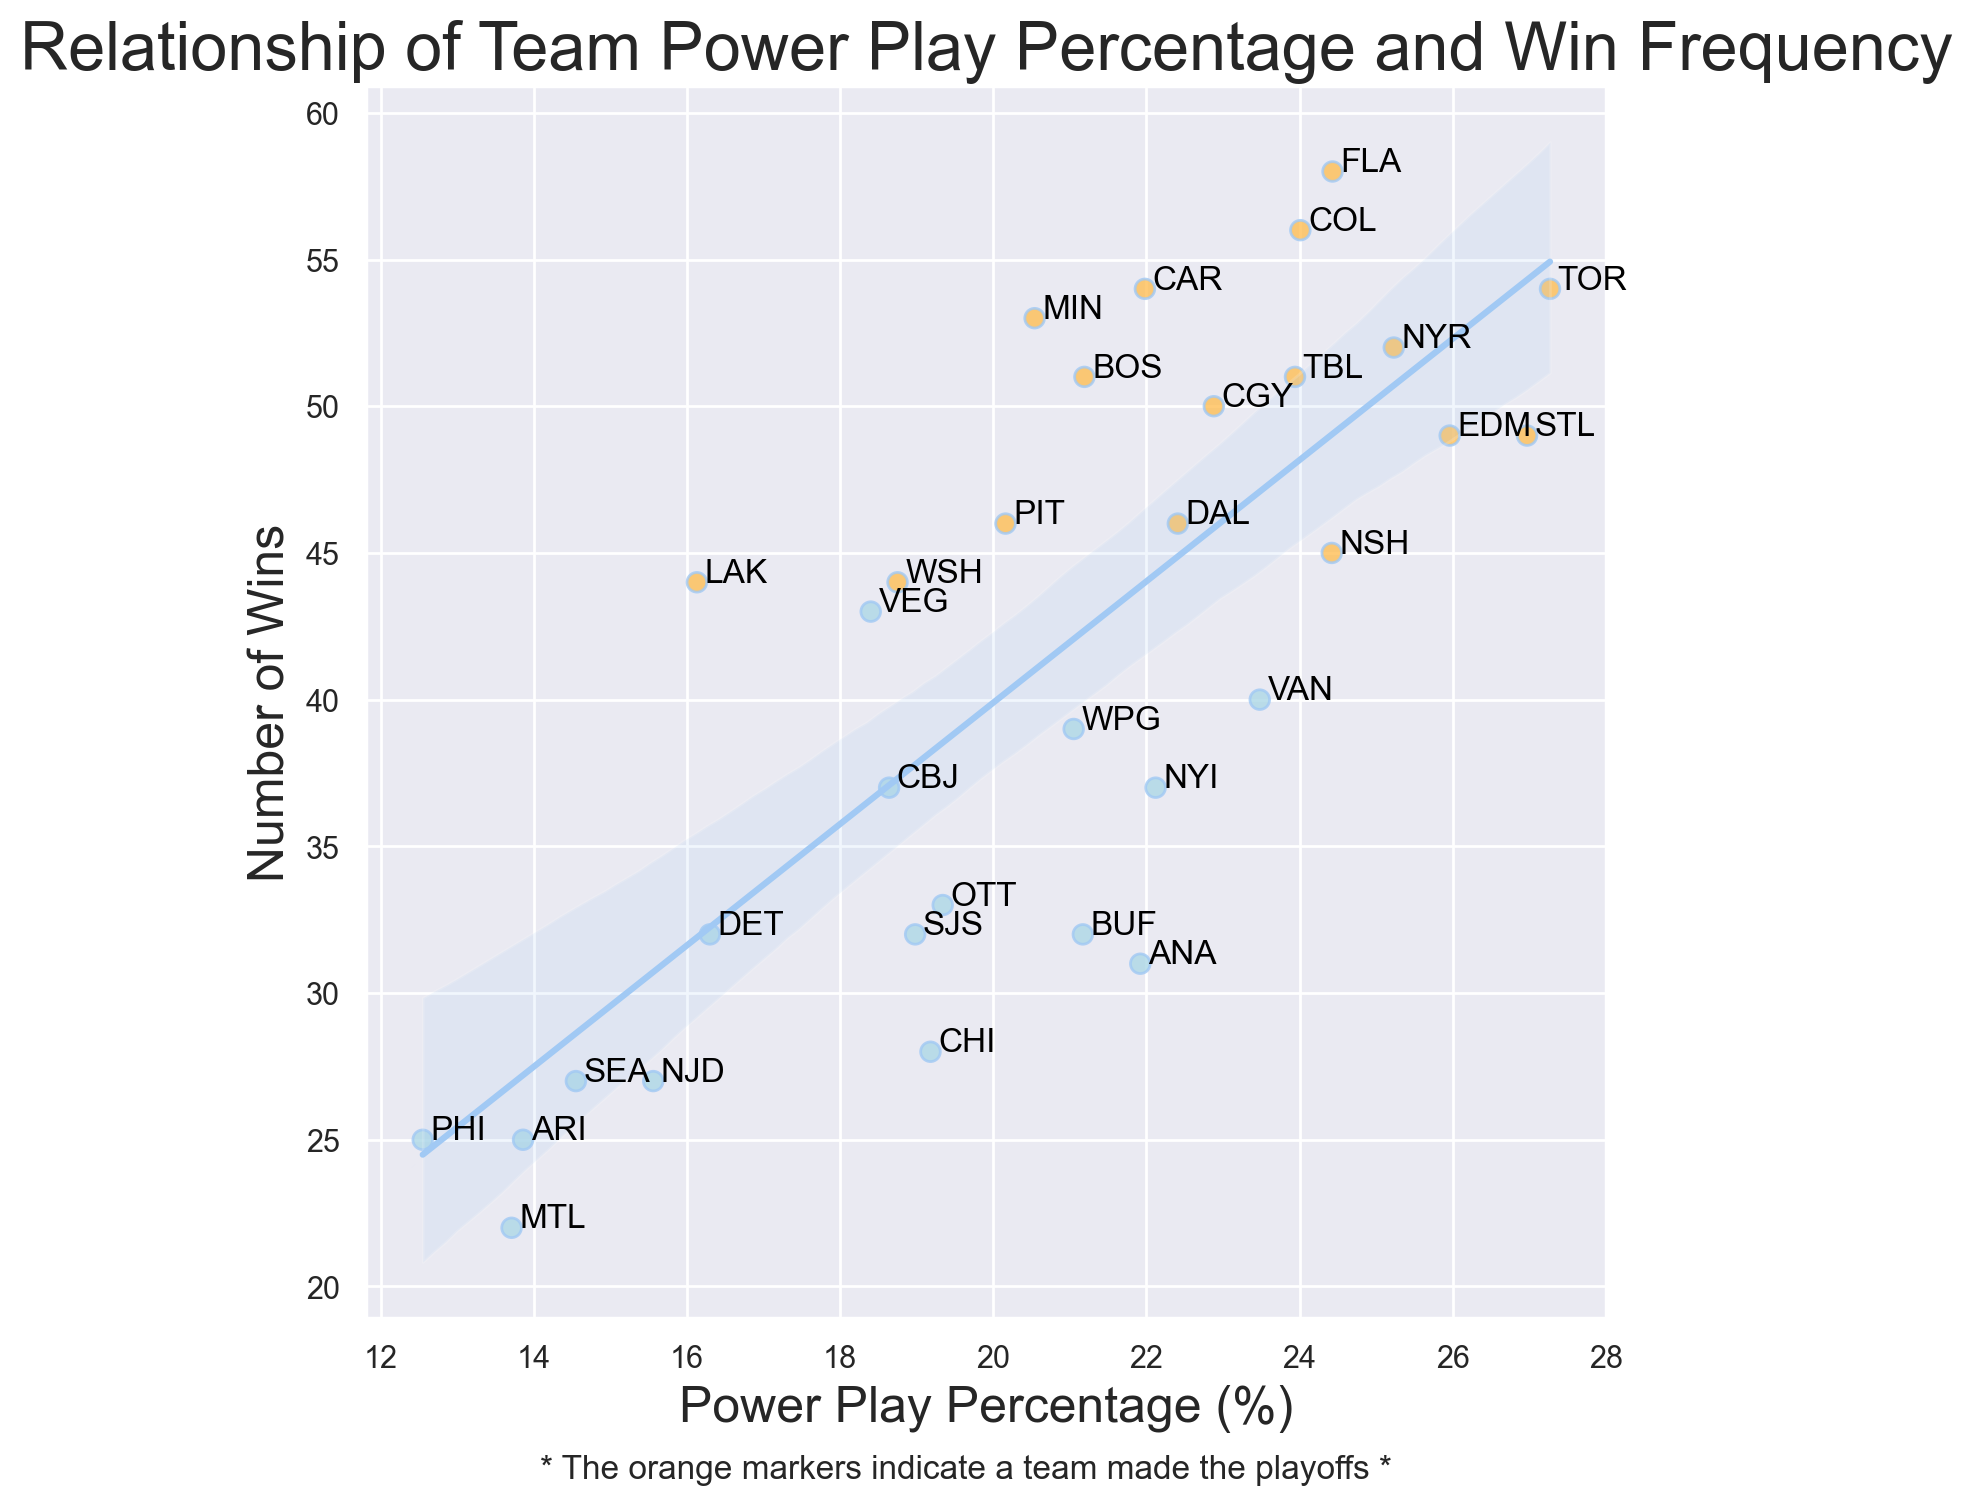

In [40]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)

# Creates a regression plot with powerplay percentage on the x-axis, win frequency on the y axis.
ax = sns.regplot(data=teams_df, x='PP%', y='W', scatter_kws={'s':50, 'facecolors': teams_df['color']})

ax.set(xlabel='Power Play Percentage', ylabel='Number of Wins', title='Relationship of Team Power Play Percentage and Win Frequency')

plt.title('Relationship of Team Power Play Percentage and Win Frequency', fontsize=24)
plt.xlabel('Power Play Percentage (%)', fontsize=18)
plt.ylabel('Number of Wins', fontsize=18)

# annotates each team's marker on the plot
for team in teams:
    plt.text(teams_df['PP%'][teams_df.TeamCode==team]+0.1,teams_df['W'][teams_df.TeamCode==team], team, color='black')
    
txt="* The orange markers indicate a team made the playoffs *"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

This graph tells us significantly more than the previous. Although it seems intuitive, it is still important to look at this objectively. This plot demonstrates that teams with a higher power play percentage were more likely to win more games. There are some exceptions to this, particularly when we look at a team such as the Anaheim Ducks, where they seem to have a 22% power play conversion rate, but fall far below the regression line in terms of wins. In addition, the LA Kings seem to have a lower power play conversion rate of 16%. However, they still had a significant number of wins and qualified for the playoffs, indicating that some other factor played a role during their regular season success.

Moving on, a penalty kill is an integral part of the game, preventing the other team from scoring when they have an additional man can be instrumental in determining the outcome of the game. Let's see just how much by creaiting another regression plot.

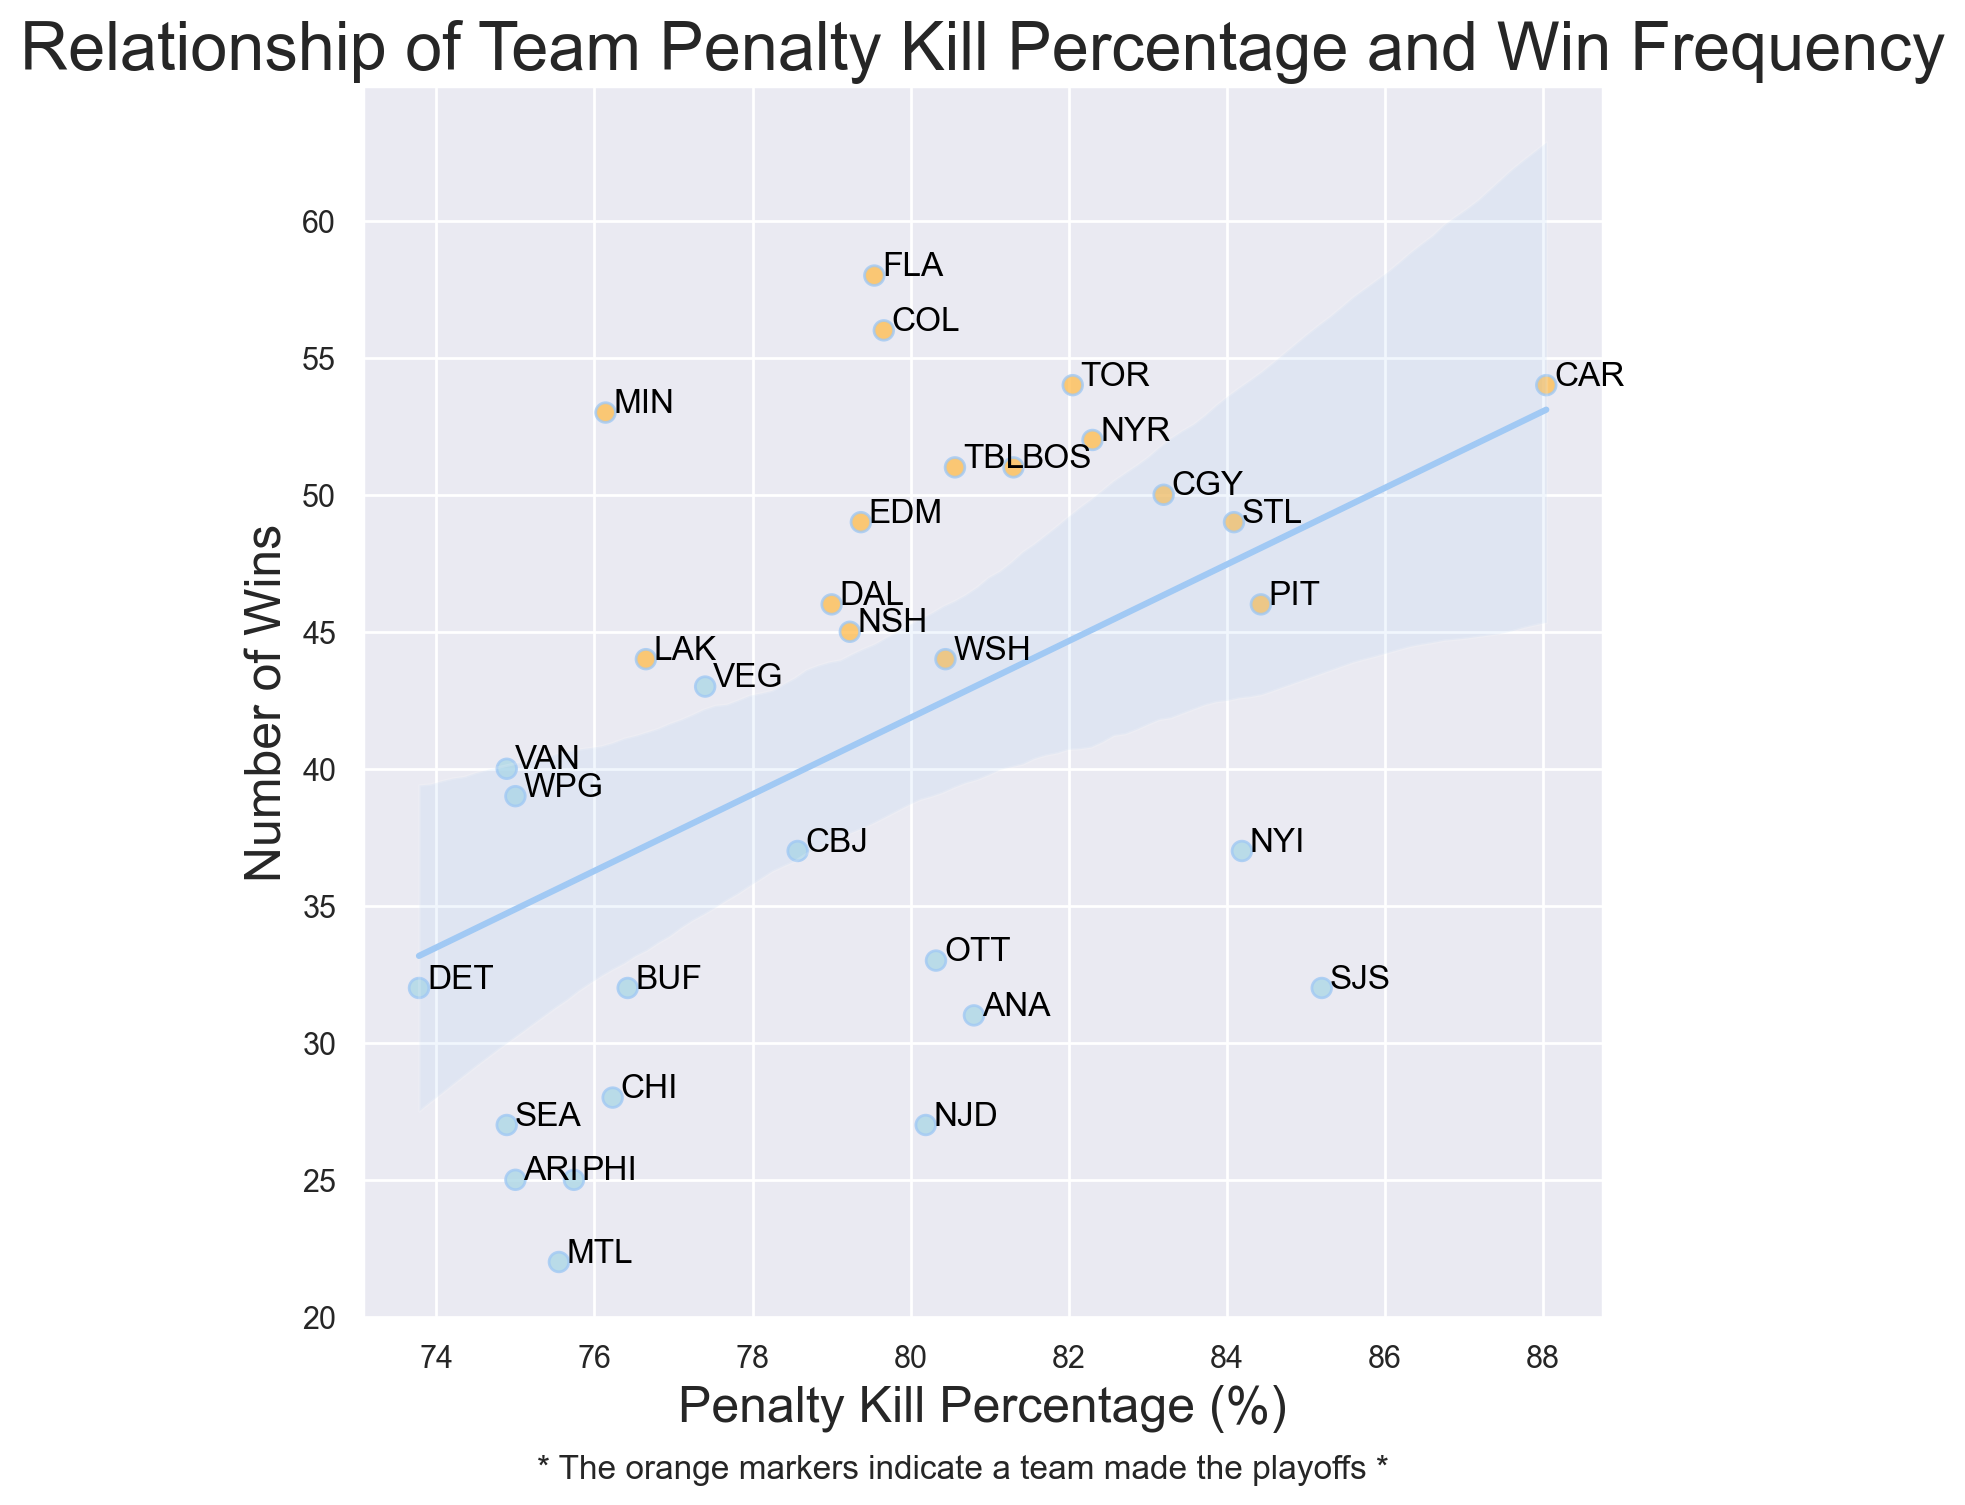

In [41]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)

# Creates a regression plot with penalty kill percentage on the x-axis, win frequency on the y axis.
ax = sns.regplot(data=teams_df, x='PK%', y='W', scatter_kws={'s':50, 'facecolors': teams_df['color']})

ax.set(xlabel='Penalty Kill Percentage', ylabel='Number of Wins', title='Relationship of Team Penalty Kill Percentage and Win Frequency')

plt.title('Relationship of Team Penalty Kill Percentage and Win Frequency', fontsize=24)
plt.xlabel('Penalty Kill Percentage (%)', fontsize=18)
plt.ylabel('Number of Wins', fontsize=18)

# annotate team on the plot
for team in teams:
    plt.text(teams_df['PK%'][teams_df.TeamCode==team]+0.1,teams_df['W'][teams_df.TeamCode==team], team, color='black')
    
txt="* The orange markers indicate a team made the playoffs *"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

Here, we can see a very similar relationship as we saw before with the power play percentage and win. It seems as though the linear relationship holds true, indicating that a higher power play percentage shares a positive relationship with the number of wins by a particular team. Interestingly enough, there are less outliers in this plot here than the previous. With the exception of the San Jose Sharks with ~86% penalty kill rate and a lackluster number of wins, this could indicate that penalty kill percentage is very closely tied to wins.

#### All Time Greats

There have been numerous generational hockey players to come through the league, but for the sake of understanding and relevance I have decided to limit those that we look at here. We will be taking a look at Wayne Gretzky, Mark Messier, Gordie Howe, Alex Ovechkin, and Sidney Crosby; all considered some of the greatest talents to ever step foot on the ice. These athletes were the best of their sport, setting records and making a name for themselves. But, what sets them apart? They each made an impact in different ways, and I aim to take a look at how they did that.<br>

By creating a new dataframe, I was able to find cumulative values of each DataFrame column that could produce it. For example, I was able to sum up all of the goals scored over a person's career in the NHL, and placed that value into a new DataFrame. This gives us a whole new dimension to our dataset (albeit still the same) to look at.

In [42]:
## Here, we just do a bit more cleaning of the data, and create a new frame of career totals to differentiate!
greats_df['YIL'] = greats_df['Age'] - greats_df['Age'].min()
    
    
temp_titles = ['name', 'YIL', 'Total Games Played', 'Total Goals', 'Total Assists', 'Total Points', 'Total PIM', 
               'Total Even-Strength Goals', 'Total Power-Play Goals', 'Total Short-Handed Goals', 'Total Game-Winning Goals',
               'Total Even-Strength Assists', 'Total Power-Play Assists', 'Total Short-Handed Assists']
career_totals_df = pd.DataFrame(columns = temp_titles)


for player in players:
    temp_df = greats_df[greats_df['Name'] == player]
    # Create a temp data frame with career stats (name, years in league, games played, goals, assists, points, PIM, EV goals,
    # PP Goals, SH Goals, GW Goals, EV Assists, PP Assists, SH assists
    tempy_df = {'name': [player], 'YIL': [temp_df['Age'].max()-temp_df['Age'].min()], 'Total Games Played': [temp_df['GP'].sum()], 
            'Total Goals': [temp_df['G'].sum()], 'Total Assists': [temp_df['A'].sum()], 'Total Points': [temp_df['PTS'].sum()], 
            'Total PIM': [temp_df['PIM'].sum()], 'Total Even-Strength Goals': [temp_df['EVG'].sum()], 
            'Total Power-Play Goals': [temp_df['PPG'].sum()], 'Total Short-Handed Goals': [temp_df['SHG'].sum()], 
            'Total Game-Winning Goals': [temp_df['GW'].sum()],'Total Even-Strength Assists': [temp_df['EVA'].sum()], 
            'Total Power-Play Assists': [temp_df['PPA'].sum()], 'Total Short-Handed Assists': [temp_df['SHA'].sum()]}
    
    agg_df = pd.DataFrame(tempy_df)
    career_totals_df = pd.concat([career_totals_df, agg_df])

career_totals_df.reset_index(inplace=True)
career_totals_df.drop(inplace=True, columns=['index'])
career_totals_df.head()

,name,YIL,Total Games Played,Total Goals,Total Assists,Total Points,Total PIM,Total Even-Strength Goals,Total Power-Play Goals,Total Short-Handed Goals,Total Game-Winning Goals,Total Even-Strength Assists,Total Power-Play Assists,Total Short-Handed Assists
0,gretzky,19.0,1487.0,894.0,1963.0,2857.0,577.0,617.0,204.0,73.0,91.0,1201.0,686.0,76.0
1,howe,33.0,1767.0,801.0,1049.0,1850.0,1685.0,566.0,211.0,24.0,121.0,684.0,353.0,12.0
2,messier,24.0,1756.0,694.0,1193.0,1887.0,1912.0,452.0,179.0,63.0,92.0,710.0,402.0,81.0
3,ovechkin,17.0,1305.0,800.0,644.0,1444.0,765.0,503.0,292.0,5.0,124.0,393.0,250.0,1.0
4,crosby,17.0,1137.0,534.0,913.0,1447.0,747.0,375.0,155.0,4.0,83.0,544.0,362.0,7.0


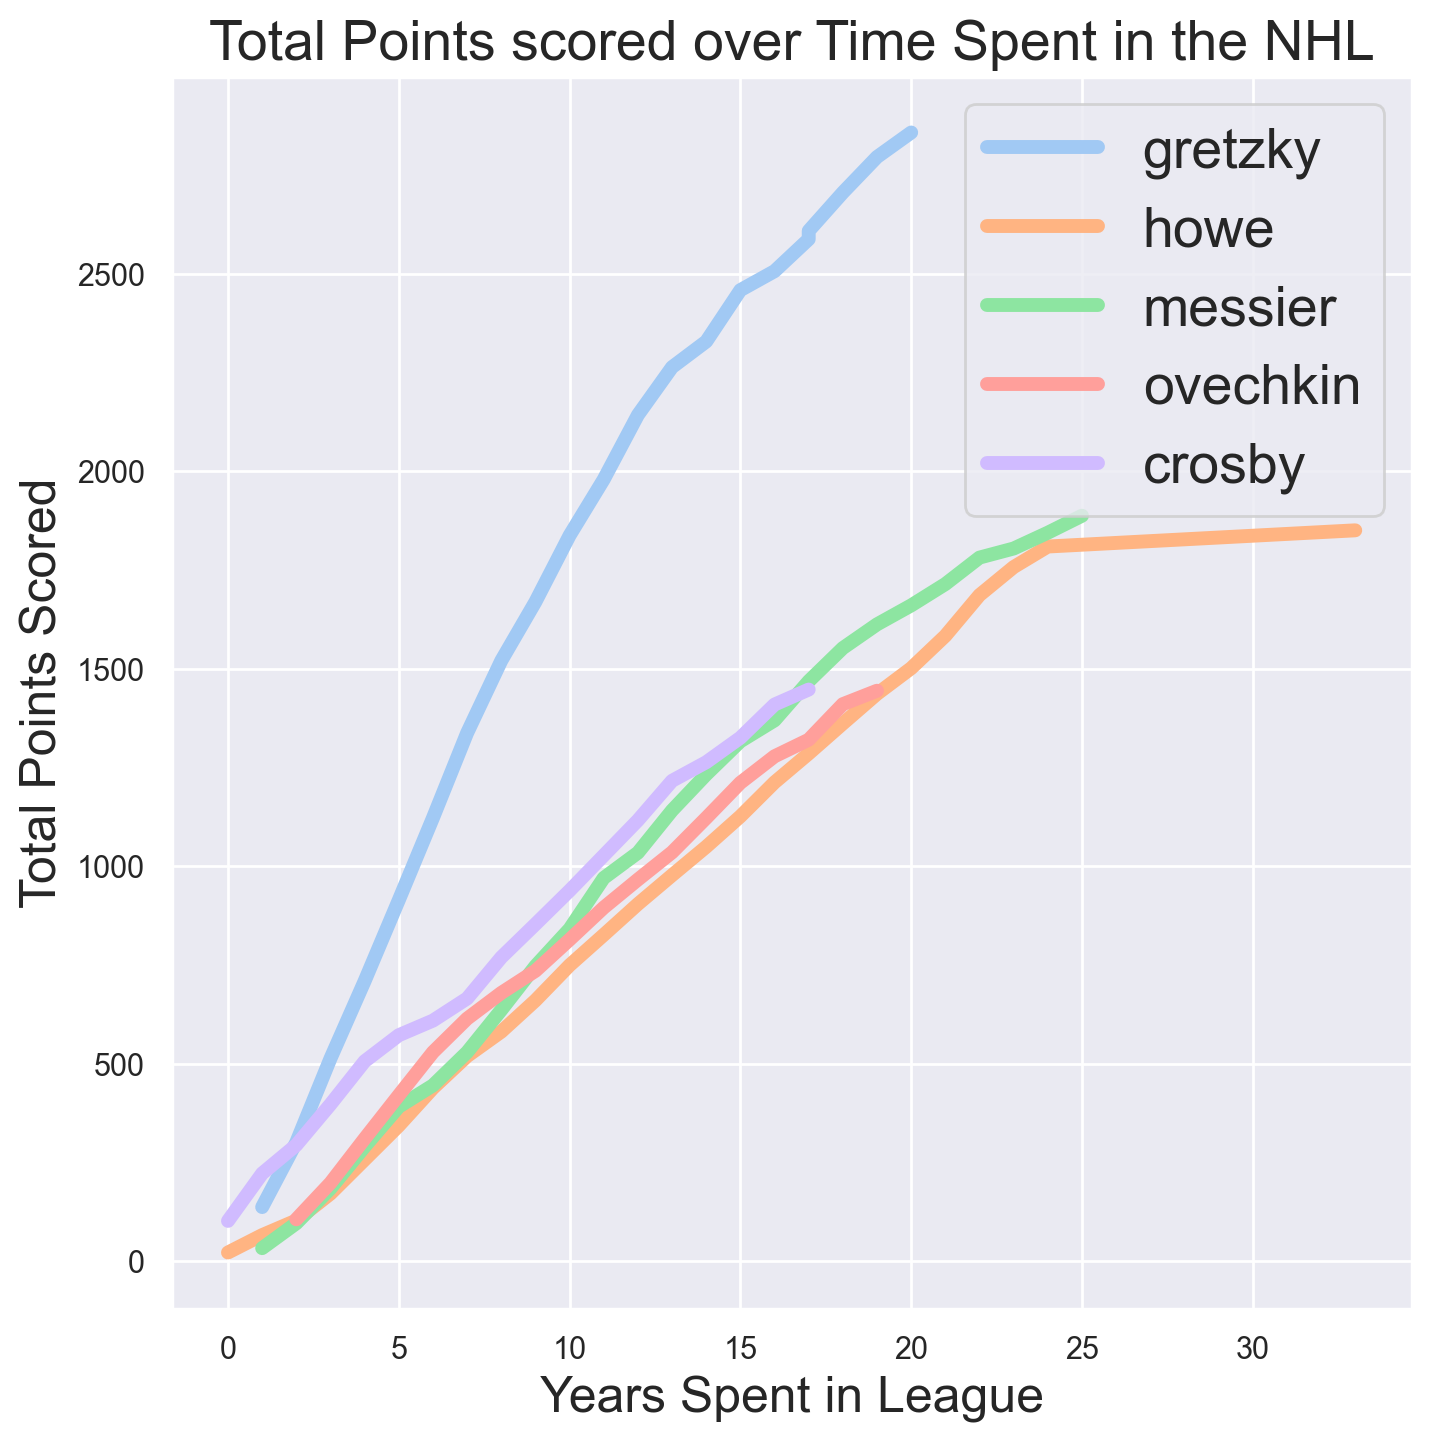

In [43]:
# Just some data cleaning to improve our dataset by getting rid of unnecessary index column.
greats_df.reset_index(inplace=True)
greats_df.drop(inplace=True, columns=['index'])

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

greats_df['YIL'] = greats_df['YIL'].astype('int')
greats_df['cumPoints'] = greats_df['cumPoints'].astype('int')
greats_df.reset_index(inplace=True)

# Plot a line for each player in which their cumulative points are tallied.
for player in players:
    rows_with_player = greats_df[greats_df['Name'] == player]
    x_axis = np.array(rows_with_player['YIL'])
    y_axis = np.array(rows_with_player['cumPoints'])
    ax.plot(x_axis, y_axis, linewidth=5.0, label=player)

ax.set_xlabel('Years Spent in League', fontsize=18)
ax.set_ylabel('Total Points Scored', fontsize=18)
ax.set_title('Total Points scored over Time Spent in the NHL', fontsize=20)
ax.legend(loc='upper right', prop={'size':20})
plt.show()

Gretzky, are you kidding me? These are some of the greatest players to ever step onto the ice, and he leaves them in the dust in just about every metric, as we will see soon. This plot does wonders in representing how closely in ability some of these players operate(d) on the ice, and just how much better than everyone else that Wayne Gretzky was. However, it is important to look at how these points breakdown even further.

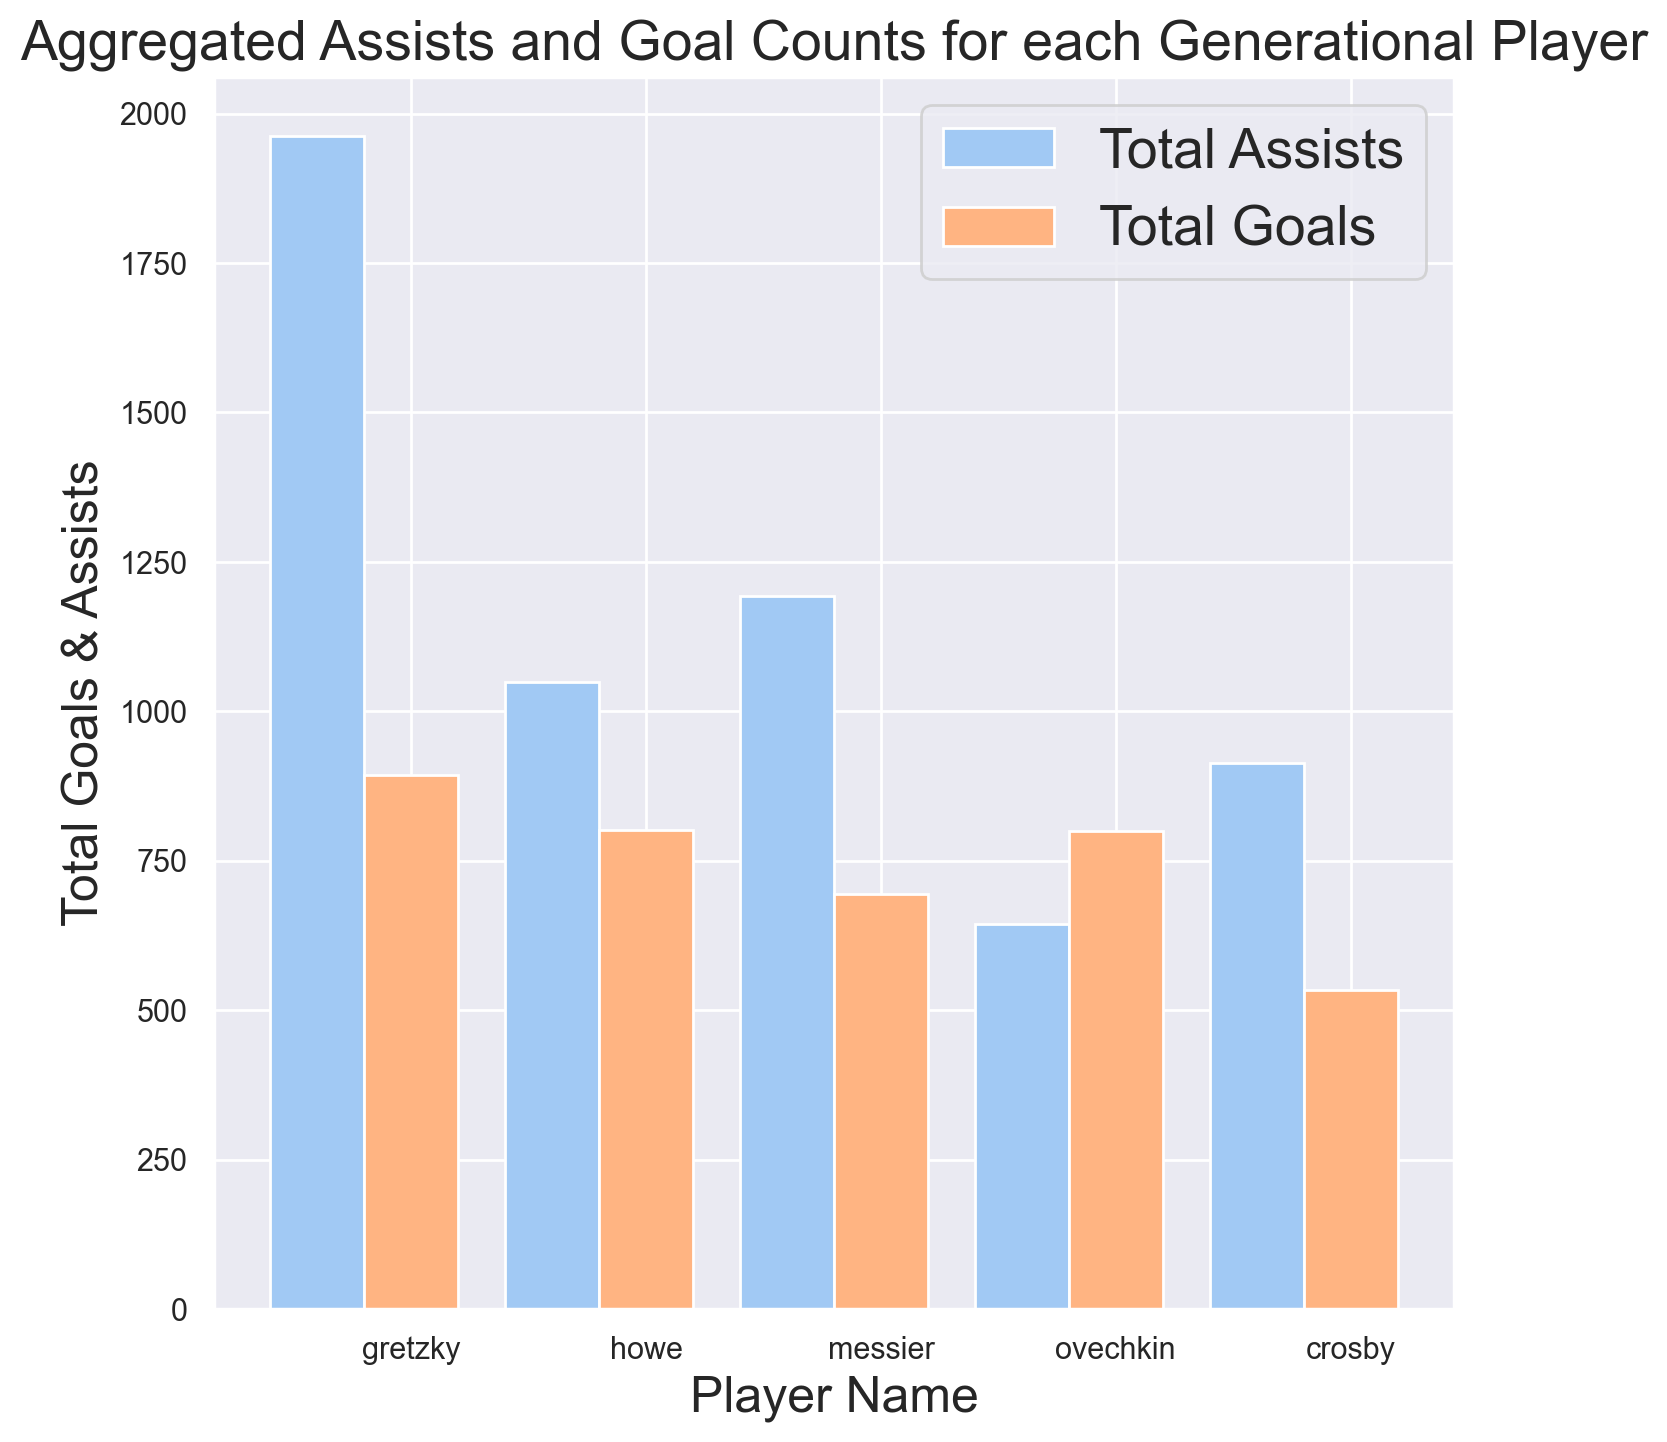

In [44]:
# Grouped bar graph showing assists, goals
fig, ax = plt.subplots(figsize=(8, 8))
x = np.arange(len(players))
width = 0.40
# plot data in grouped manner of bar type
ax.bar(x-0.2, career_totals_df['Total Assists'], width)
ax.bar(x+0.2, career_totals_df['Total Goals'], width)

ax.set_xticks(x + width / 2)
ax.set_xticklabels(players)
ax.set_xlabel('Player Name', fontsize=18)
ax.set_ylabel('Total Goals & Assists', fontsize=18)
ax.set_title('Aggregated Assists and Goal Counts for each Generational Player', fontsize=20)
ax.legend(['Total Assists', 'Total Goals'], prop={'size': 20})

plt.show()

As we can see from the grouped bar chart produced here, Gretzky is still very clearly ahead of everyone else on points, but it is the differentiation in how those points are accumulated that we can see better here. All of these generational talents are similar in terms of goal output, but if we look at the assist breakdown, that is where it seems to vary more. Gretzky has nearly twice as many assists as each person we are looking at here, an impressive feat. Another important thing to note is that all of these players here have produced more assists than goals except one person - Alex Ovechkin. Considered the best goal-scorer of all time (despite not hitting Gretzky numbers yet), we will look to verify if that title holds true.

## IV. Further Data Testing
### The Greatest Goal Scorer of All-Time?

<img src="./ovi/ovi-goal.jpeg" alt="Ovechkin Shot"><br>
*© NHL 2022. All Rights Reserved.*


Alex Ovechkin, just recently hitting the 800 goal mark after 17 years in the NHL playing for the Washington Capitals, has been called the GOAT - the greatest goal-scorer of all time. We want to see just how true this is. First, lets take a look at his goal breakdowns over the years. We can do this by using matplotlib to chart a line for his goals and assists (power play and even strength).

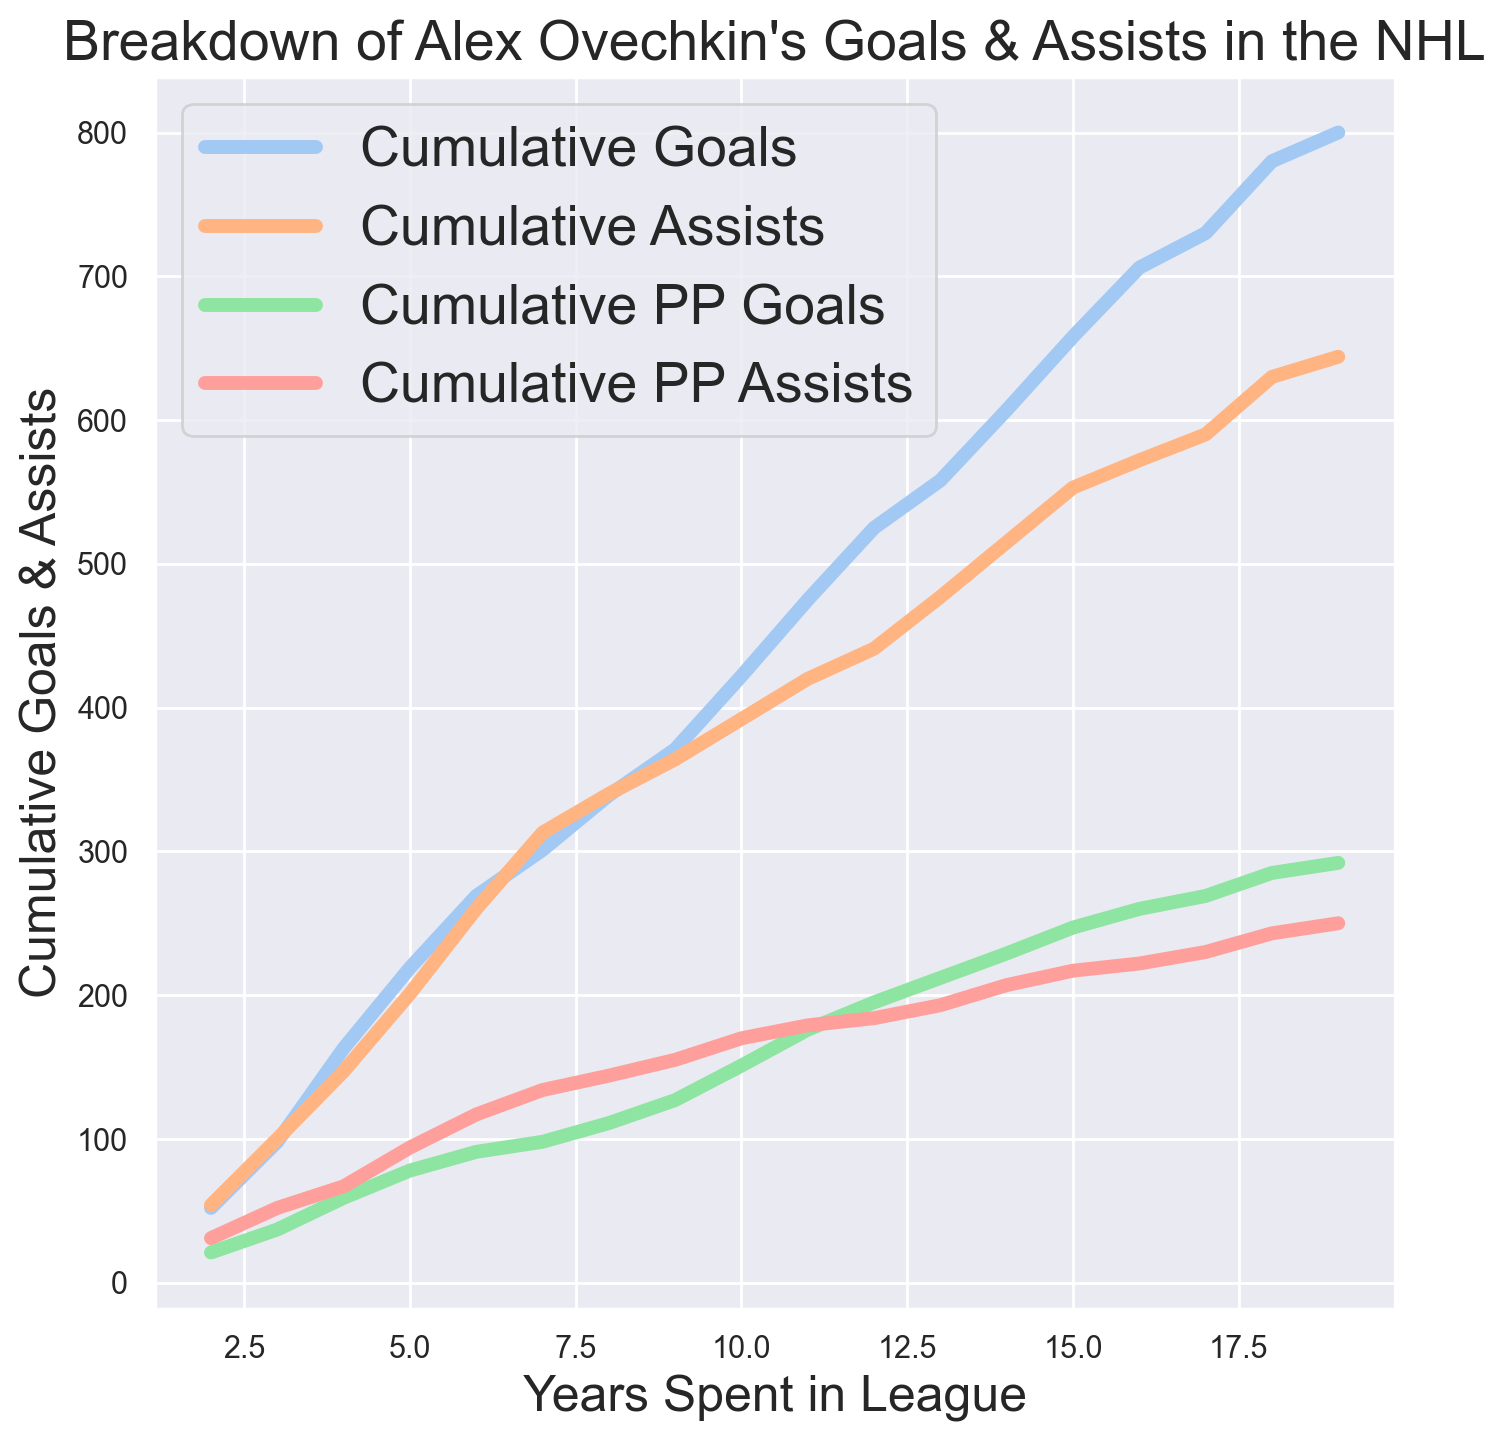

In [45]:
# Data munging to get rid of unneccesary columns for readability
ovi_df = greats_df[greats_df['Name'] == 'ovechkin']
ovi_df = ovi_df.reset_index()
ovi_df = ovi_df.drop(columns=['level_0', 'index', 'Name'])

# Creates cumulative sums for each of our lines on the graph
ovi_df['cumGoals'] = ovi_df['G'].cumsum()
ovi_df['cumAssists'] = ovi_df['A'].cumsum()
ovi_df['cumPPGoals'] = ovi_df['PPG'].cumsum()
ovi_df['cumPPAssists'] = ovi_df['PPA'].cumsum()

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
# Creates 4 lines on our plot.
ax.plot(ovi_df['YIL'], ovi_df['cumGoals'], linewidth=5.0, label='Cumulative Goals')
ax.plot(ovi_df['YIL'], ovi_df['cumAssists'], linewidth=5.0, label='Cumulative Assists')
ax.plot(ovi_df['YIL'], ovi_df['cumPPGoals'], linewidth=5.0, label='Cumulative PP Goals')
ax.plot(ovi_df['YIL'], ovi_df['cumPPAssists'], linewidth=5.0, label='Cumulative PP Assists')


ax.set_xlabel('Years Spent in League', fontsize=18)
ax.set_ylabel('Cumulative Goals & Assists', fontsize=18)
ax.set_title('Breakdown of Alex Ovechkin\'s Goals & Assists in the NHL', fontsize=20)
ax.legend(loc='upper left', prop={'size':20})
plt.show()

Python has a library called seaborn (which we used before), that has many powerful plotting tools. We can  take a brief look at Ovechkin's goal distribution from each year he has spent in the league with the violinplot below, an effective visualization of spread, which you can read more about at [here](https://seaborn.pydata.org/generated/seaborn.violinplot.html). There are many methods of distribution visualization, which you can read more about at [https://datavizcatalogue.com/search/distribution.html](https://datavizcatalogue.com/search/distribution.html). I chose to go with a violin plot because it is easy to read, shows where most of the data collects, and is visually pleasing. Alternative distribution plots include box-and-whisker plots, bubble charts, histograms, and more. Fortunately, these are all built into python, so you can play around with any of them!

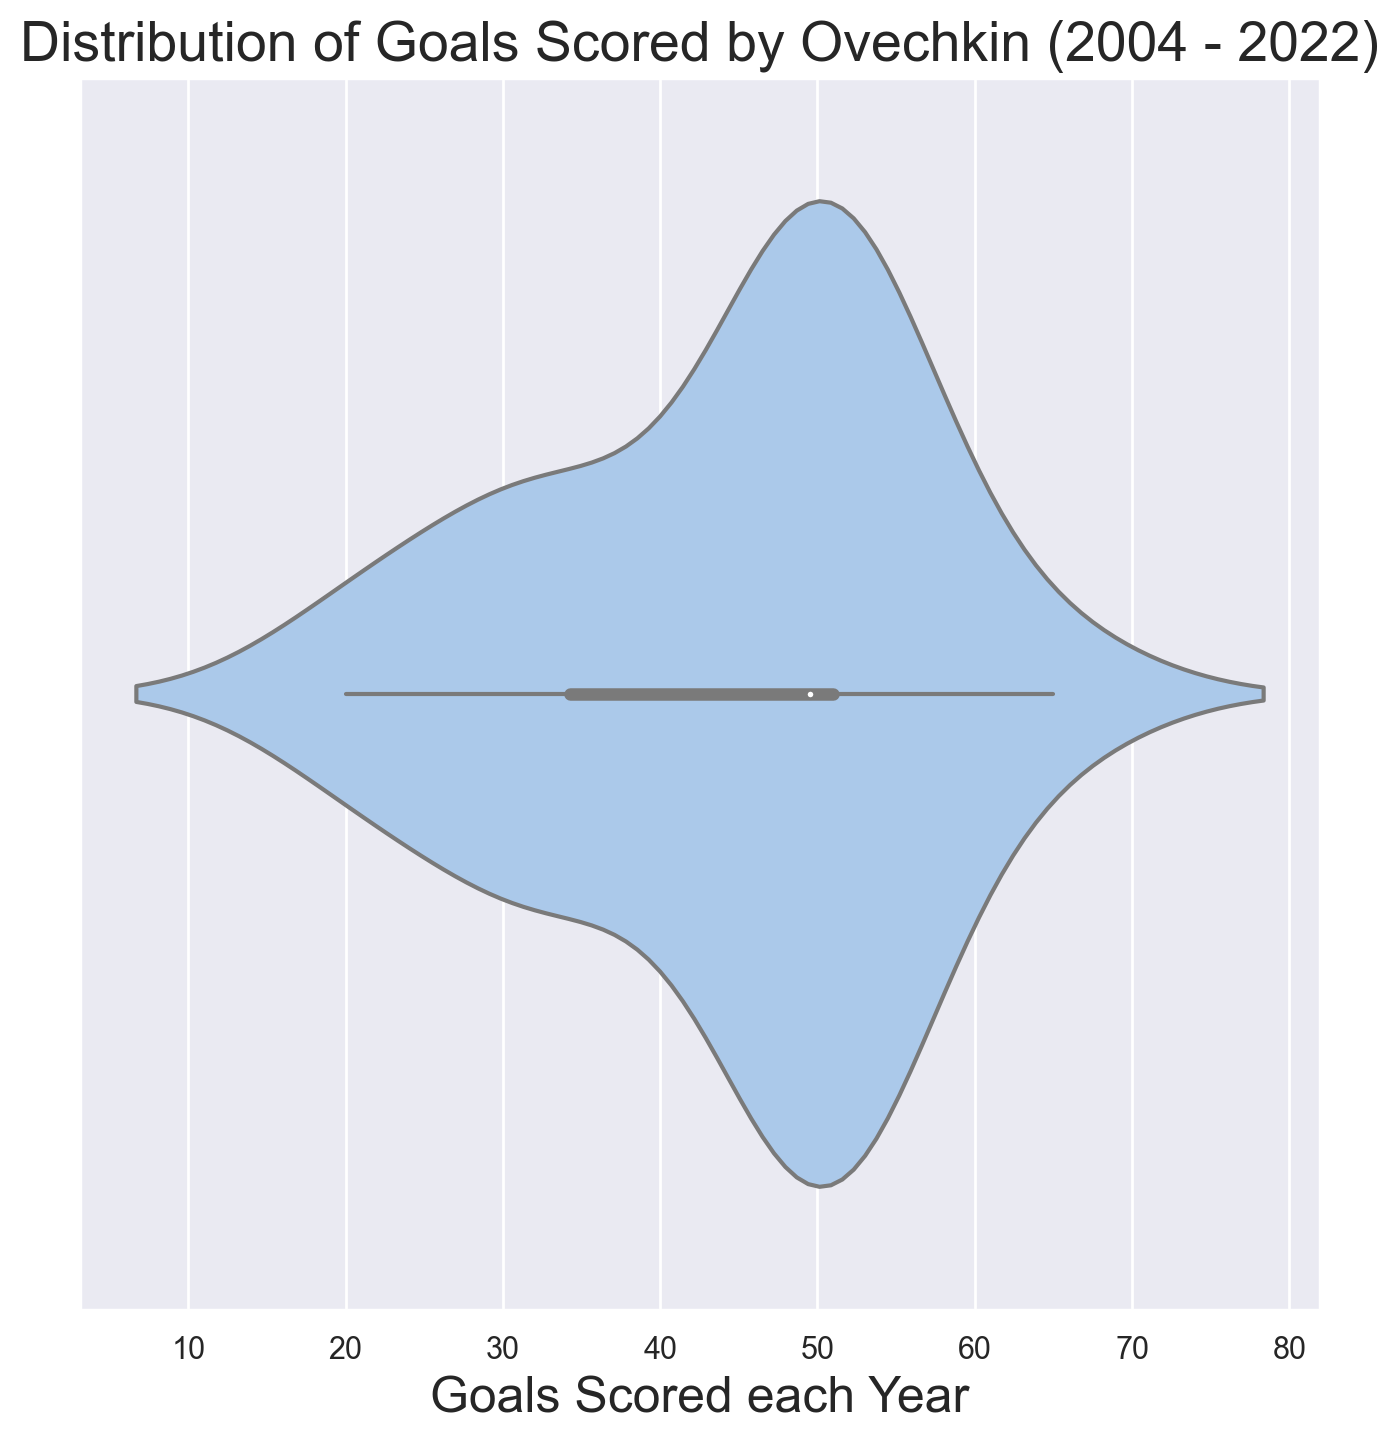

In [46]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)


ax = sns.violinplot(data=ovi_df, x='G')

ax.set_title('Distribution of Goals Scored by Ovechkin (2004 - 2022)', fontsize=20)
ax.set_xlabel('Goals Scored each Year', fontsize=18)

plt.show()

Ovechkin's goal and assist production is pretty steady throughout the years, for both power play and even strength. This is impressive and shows just how good Ovechkin is, but it doesn't yet tell us if he is the "GOAT". In fact, we can see this by taking a look at his goal output against the current goal-record holder, Wayne Gretzky. We do this by creating a line plot that shows Gretzky and Ovechkin's Goals scored while they have been in the league.

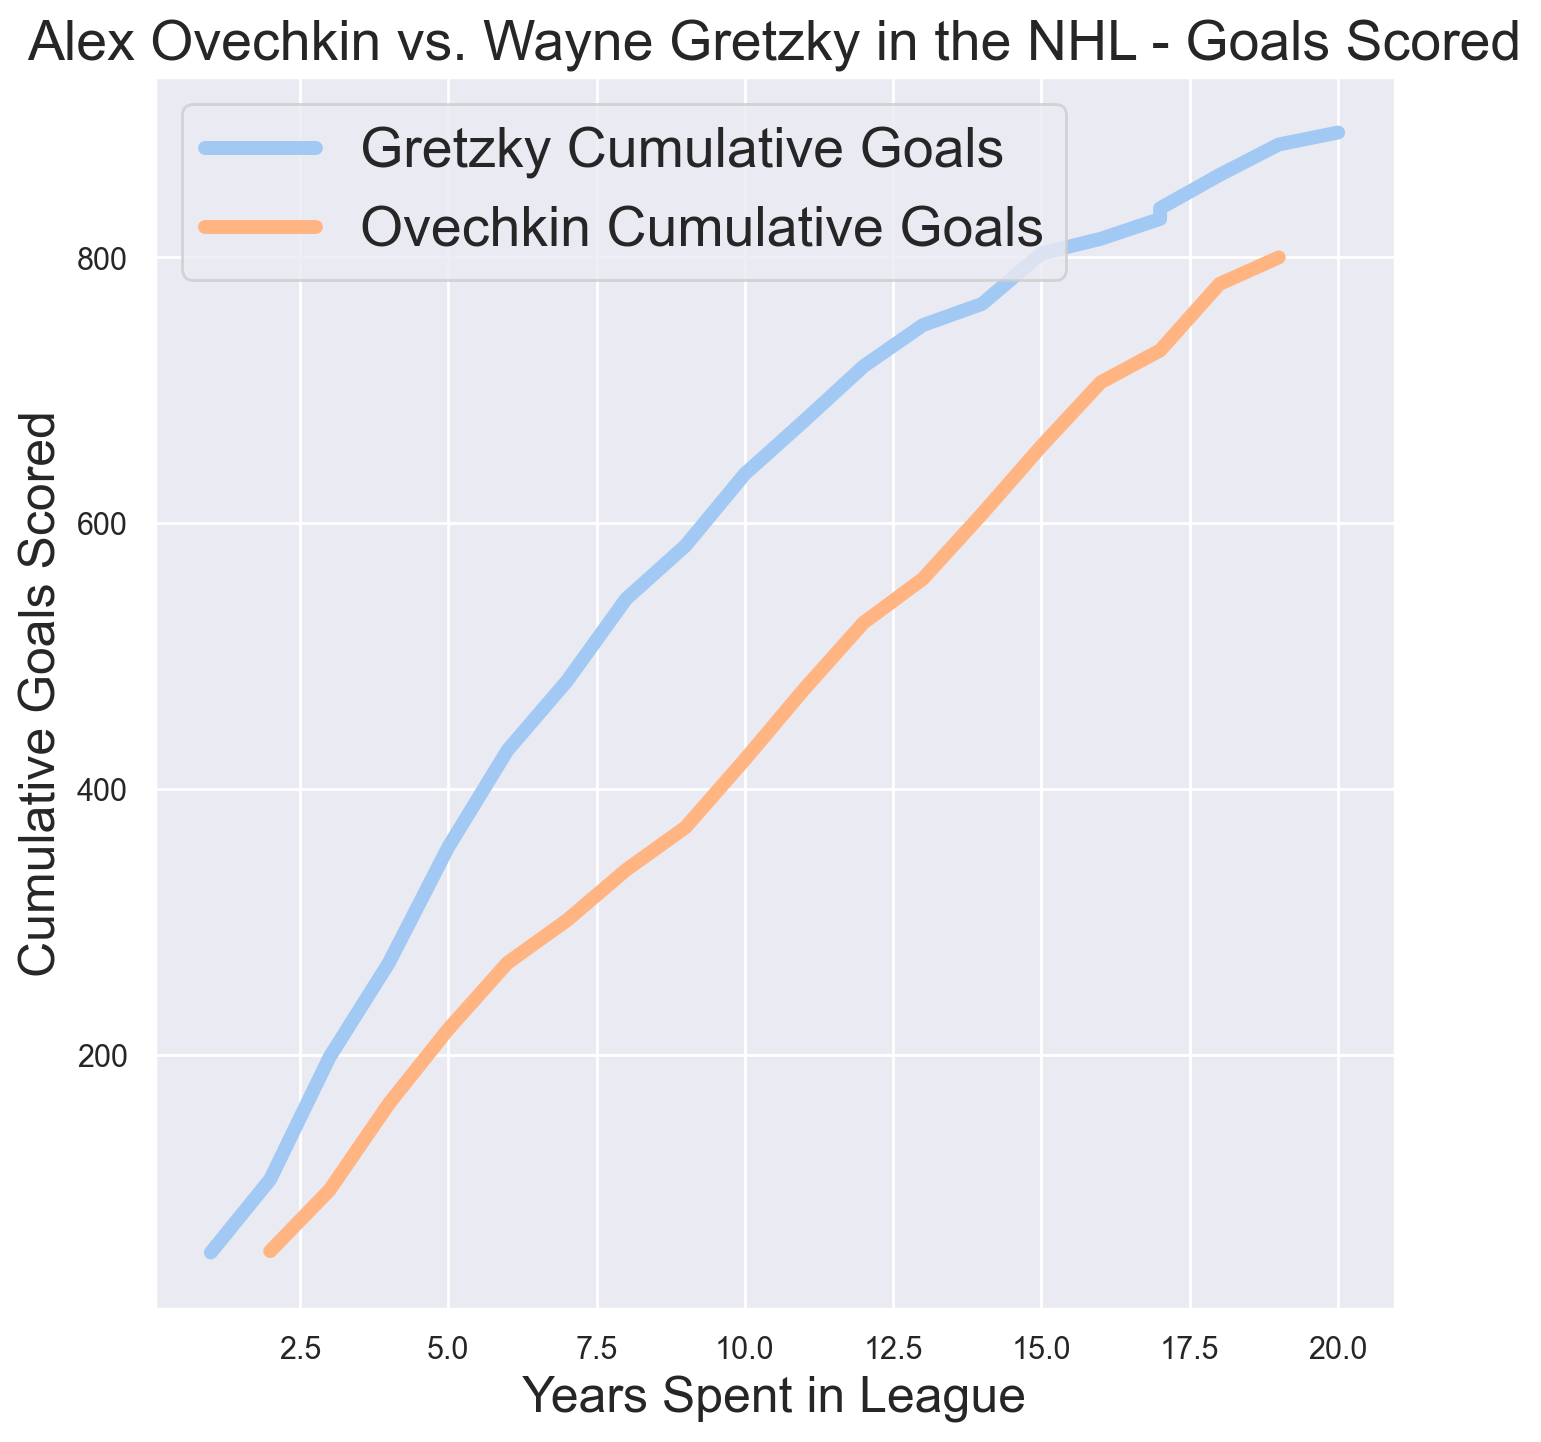

In [47]:
gretzky_df = greats_df[greats_df['Name'] == 'gretzky']
gretzky_df = gretzky_df.reset_index()
gretzky_df = gretzky_df.drop(columns=['level_0', 'index', 'Name'])

gretzky_df['cumGoals'] = gretzky_df['G'].cumsum()

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

ax.plot(gretzky_df['YIL'], gretzky_df['cumGoals'], linewidth=5.0, label='Gretzky Cumulative Goals')
ax.plot(ovi_df['YIL'], ovi_df['cumGoals'], linewidth=5.0, label='Ovechkin Cumulative Goals')


ax.set_xlabel('Years Spent in League', fontsize=18)
ax.set_ylabel('Cumulative Goals Scored', fontsize=18)
ax.set_title('Alex Ovechkin vs. Wayne Gretzky in the NHL - Goals Scored', fontsize=20)
ax.legend(loc='upper left', prop={'size':20})
plt.show()

We can see here, it's frighteningly close. Gretzky still has a large gap, but he stopped playing in his 20th year. We can even start to see toward the end of Ovechkin's line that his goal-scoring hasn't necessarily slowed down, but even Gretzky's goal scoring digressed toward the end of his career. Can Ovechkin chase the record set by Gretzky at 894 goals and beat it?

### PPG or Not? Some Fun with Classification

In machine learning, there are numerous ways to use data to achieve goals. Whether it be predicting future data, classifying text, images, or videos, or by trying to process language, we can do incredible things to visualize data. What's even more fun is that we can apply it to what we are doing here in this project. 

I am now going to build a classifier algorithm, but before I tell you what it is for, I want to explain how I got this new data. Now, I will be using a dataset that I built by scraping the NHL's undocumented statistics API. I wish I could provide more information on how to navigate it, but if you travel to [Drew Hynes' gitlab](https://gitlab.com/dword4/nhlapi) page, he has composed some beginning navigation tools for the API. I didn't do the scraping here in this notebook, but a zip file is available if you are interested in the code for it. Basically, I scraped through every Washington Capitals game since 2010 (when they started recording X, Y data), and produced a dataset where you can see every goal scored by Ovechkin, including the date scored, type of shot, and whether it is a power play goal or not.<br>

What we are doing here is creating a [k Nearest Neighbors classifier using scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to classify whether an Ovechkin goal was scored on a power play or not. In reality, only the x and y coordinates will be features taken into account by the classifier, making nearest neighbors the most useful. First, I will start off by showing you a heat map of Ovechkin's goals on the ice using [@the-bucketless' python 'hockey_rink' package](https://github.com/the-bucketless/hockey_rink). As a reminder, we are not looking at all of Ovechkin's goals scored over his career, but just from the 2010-2011 season until present (2022-2023 season).

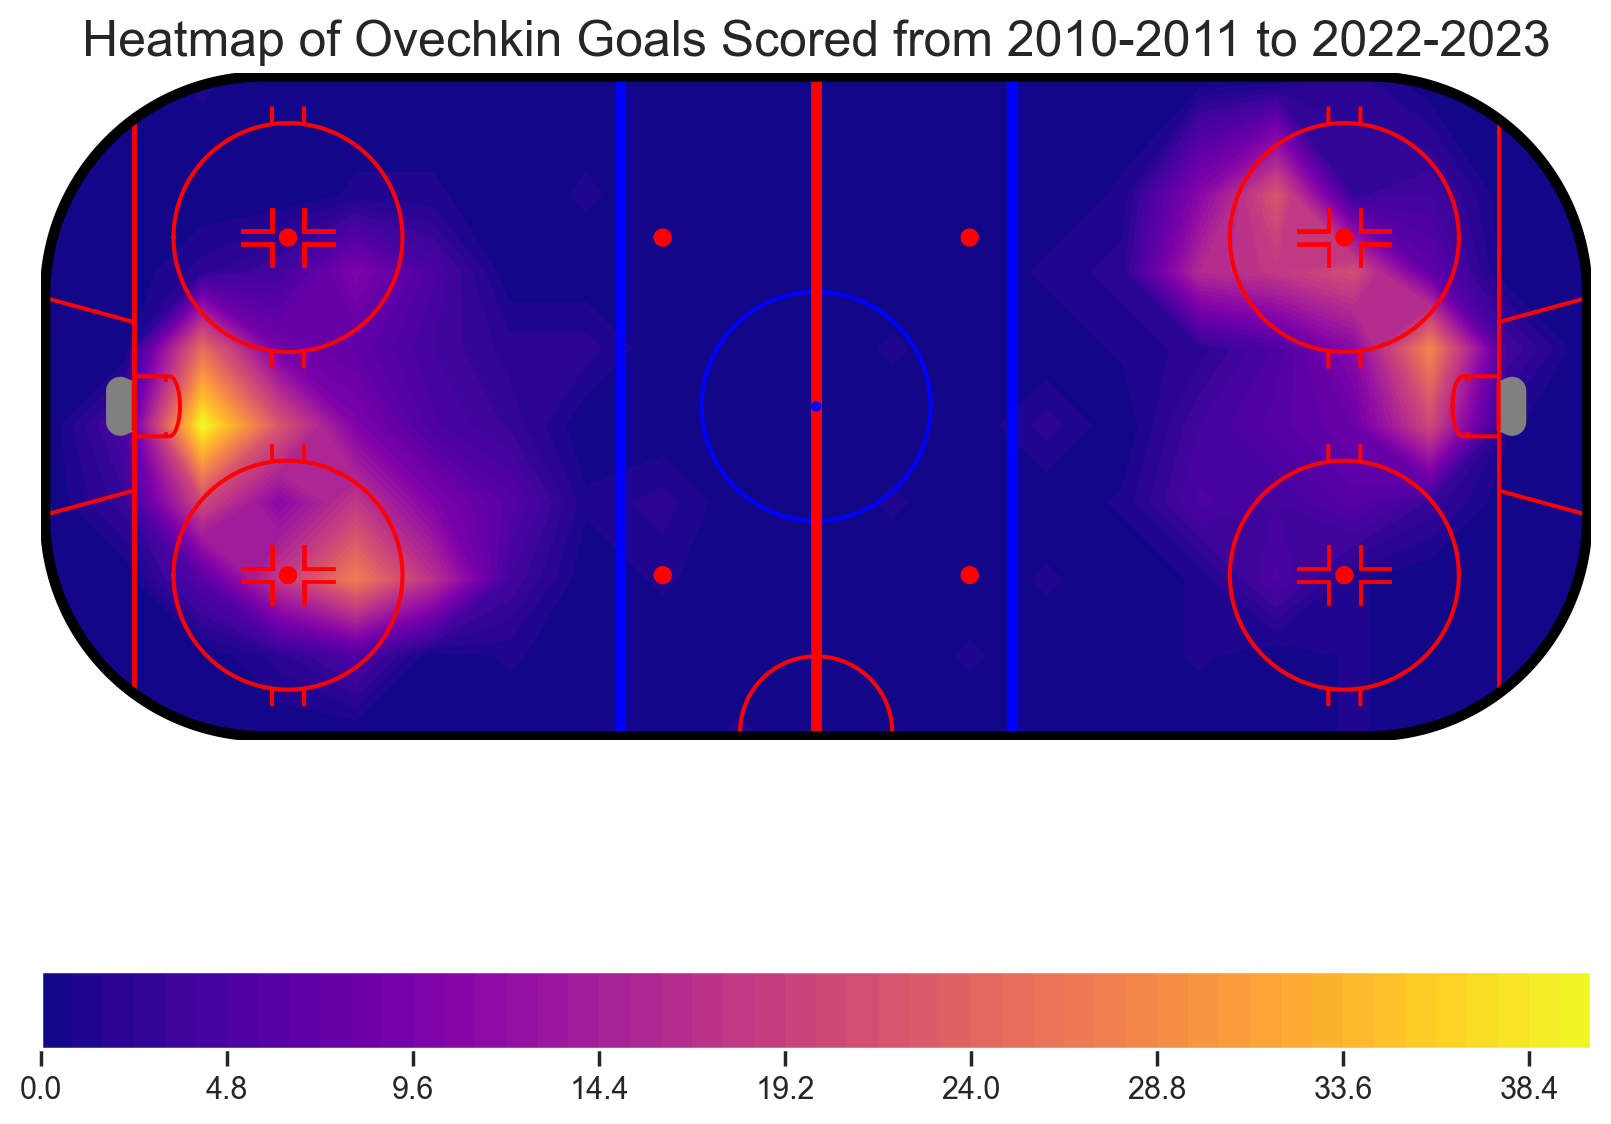

In [48]:
from hockey_rink import NHLRink
ovi_goals_df = pd.read_csv('./ovi/ovi_goals.csv')

fig, ax = plt.subplots(figsize=(10,10))
rink = NHLRink()
ax=rink.draw()
ax.set_title('Heatmap of Ovechkin Goals Scored from 2010-2011 to 2022-2023', fontsize=18)
contour_img = rink.contourf(ovi_goals_df['XLocation'], ovi_goals_df['YLocation'], cmap='plasma', levels=50, binsize=10)
plt.colorbar(contour_img, orientation='horizontal')
plt.show()

We can see from the heatmap formed from the XY location of Ovechkin's shots that he is very consistently shooting from the top of the left circle, as that is where most of our data collects on both ends of the ice. Using our classifier algorithm, we can dive even deeper into this to try and classify his goals as power play goals or not. We need to modify our datatable slightly to remove any non-numerical values for our classifier. Then we will train our model using [sklearn's train_test_split functionality](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). In training our model, we need to tune our hyperparamers. In this case, we will be figuring out how many neighbors allows for us to build an optimal model. This is done using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) - an exhaustive validation technique that will help us find our optimal hyperparameters. Then after running our model, we can determine how accurate it is!

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# PREPROCESSING

# Remove our datetime column
ovi_goals_df = ovi_goals_df.drop(columns=['DateTime'])
# Change our power play columnn to be 0 or 1 (these will be our binary labels)
ovi_goals_df['PowerPlay'] = pd.to_numeric(ovi_goals_df['PowerPlay'])
binary_labels = ovi_goals_df['PowerPlay']
ovi_goals_df = ovi_goals_df.drop(columns=['PowerPlay'])
# Get dummy columns for our shot types
ovi_goals_df = pd.get_dummies(ovi_goals_df, columns=['Shot Type'])

binary_labels = np.array(binary_labels)

# Here we are splitting our data into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(ovi_goals_df, binary_labels, test_size=0.2)

# Here we are building our KNearestNeighbors Classifer
knn = KNeighborsClassifier()
neighbors = list(range(1,9))
n_parameters = dict(n_neighbors=neighbors)
knn_tuning = GridSearchCV(knn, param_grid = n_parameters, scoring='accuracy', cv=10)
knn_result = knn_tuning.fit(X_train, y_train)
print(knn_result.best_estimator_.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}


If we take a look at the printout statement above, our GridSearch has optimized the number of neighbors for us to be 8. So now when we train and test our actual model, our nearest neighbors should be optimized and provide us with the best accuracy!

In [50]:
# Building our actual KNN Model
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = metrics.accuracy_score(y_test, knn_y_pred)*100
print('Our K-Nearest-Neighbors model accuracy is: ' + str("{0:.3f}".format(knn_accuracy)) + '%')

Our K-Nearest-Neighbors model accuracy is: 74.312%


Awesome! It seems as though our K-Nearest-Neighbors model was able to predict whether or not a goal was scored on a Power Play with an accuracy of about 74%. Although this seems a little low, it is important to remember that we didn't have too many features to look at in our dataset, just shot type, x location, and y location. Perhaps if we had more features such as shot speed or TOI (time on ice), we could get even better results. These classifiers are extremely powerful tools that can be used in numerous ways.<br>

### Future Direction
Our classifier model here only determined whether a goal was scored on a power play by Ovechkin, but the classification possibilities are endless. We could determine and predict shot success, assist likelihood, and so much more. 

# V. Conclusion
In this tutorial, we only scratched the surface to the data exploration possibilities, particularly with NHL data. This project could be expanded to examine so much more, like other league statistics, player comparisons, and true deep dives into the so-called "generational talents". The NHL statistics database is advancing more and more every year, and we have been lucky that they share their statistics with the public at such a high and in-depth level. There is so much more to explore!<br>

In this tutorial we successfully looked at the standard Data Science Pipeline through NHL data by examining season data from the NHL 2021-2022 season and seeking out relationship factors, comparing some of the all-time greatest hockey players, and by using machine learning to get a deeper understanding of the goal-scoring facet of Alex Ovechkin's career. In the future, I hope you or I can take this project further by doing some heavier analysis of many different players and teams throughout the NHL's history.<br>

Not only is hockey an extremely entertaining sport to watch, but it is fascinating to dive into the statistical analysis side. It is so fundamentally important to a team's day-to-day routine/analysis, an individual athlete's athletic priorities. Often, we might take for granted the amount of data available to us, and hopefully this tutorial inspired you to leave that mindset in the past.